# Import Packages for the script

In [1]:
import json
import requests
import os
import urllib.request
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


# Extract JSON response over  HTTP

In [2]:
url="http://ptrckprry.com/course/ssd/data/federalist.json"
with urllib.request.urlopen(url) as response:
    k = response.read()

# Convert all text to lower case making it case insensitive for the script

In [3]:
k=str(k)
a=k.lower()

# Replace symbols in json for characters like backslash,single quotes

In [4]:
k=k.replace("\\\\n"," ").replace("\\\'","'").replace("b\'","")

In [5]:
#a=a.replace("\\\\n"," ").replace("\\\'","'").replace("b\'","")

In [6]:
l=[]
dictlist=[]

z=k.split("\\n")

del z[-1]

# Convert JSON response to clean dictionary

In [7]:
for i in range(0,len(z)):
    try:
        dictlist.append(json.loads(z[i]))
    except:
        try:
            d=z[i]
            #d=d.replace('\\\\*','"').replace('*','"')
            ftext=d[d.find('"text": "')+9:d.find('", "date":')]#.replace('"','*')
            fauthor=d[d.find('"author": ')+11:d.find('", "text":')]
            fdate=d[d.find('"date": ')+8:d.find('", "title": ')]
            ftitle=d[d.find('"title": ')+10:d.find('", "paper_id": ')]
            fpaperid=d[d.find('"paper_id": ')+12:d.find(', "venue": ')]
            fvenue=d[d.find('"venue": ')+10:d.find('"}')]
            emptydict={}
            emptydict['author']=fauthor
            emptydict['text']=ftext
            emptydict['date']=fdate
            emptydict['title']=ftitle
            emptydict['paper_id']=fpaperid
            emptydict['venue']=fvenue
            #emptydict=str(emptydict)
            dictlist.append(emptydict)
            #l.append(i)
        except:
            l.append(i)

# Add all json response in pandas dataframe and create a total wordcount for each essay

In [8]:
#dictlist[1]
from collections import Counter

df=pd.DataFrame(columns=['paper_id','text','date','title','author','venue','wordcount'])

df['total_words']=0

#df['text']=df['text'].replace('\\\\"','"')

for i in range(0,len(dictlist)):
    text=dictlist[i]['text'].lower().replace("'"," ").replace("!"," ").replace("?"," ").replace(","," ").replace(":"," ").replace(";"," ").replace("   "," ").replace("  "," ").replace('\\\\"','"')
    words =text.split()
    wordcount = Counter(words)
    df = df.append({"paper_id":dictlist[i]['paper_id'],
    "text": text,
    "date":dictlist[i]['date'],"title":dictlist[i]['title'],"author":dictlist[i]['author'],"venue":dictlist[i]['venue'],"wordcount":wordcount}, ignore_index=True)

for i in range(0,len(df)):
    #df['text'].iloc[i]=df['text'].iloc[i].replace('\\\\"','"')
    #df['text'].iloc[i]=df['text'].iloc[i].replace("'"," ").replace("!"," ").replace("?"," ").replace(","," ").replace(":"," ").replace(";"," ").replace("   "," ").replace("  "," ")
    #df['text'].iloc[i]=df['text'].iloc[i].lower()
    df['total_words'].iloc[i]=len(df['text'].iloc[i].split(" "))
    try:
        if df['date'].iloc[i].find("null") != -1:
            df['date'].iloc[i]="null"
        else:
            continue
    except:
        df['date'].iloc[i]="null"

In [40]:
k=str(str(df['wordcount'].iloc[0]))[str(df['wordcount'].iloc[0]).find('{'):]

# Create Bar graphs and histograms of custom size

In [45]:
import matplotlib.pyplot as plt; #plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print("Current size:", fig_size)
 


Current size: [20, 9]


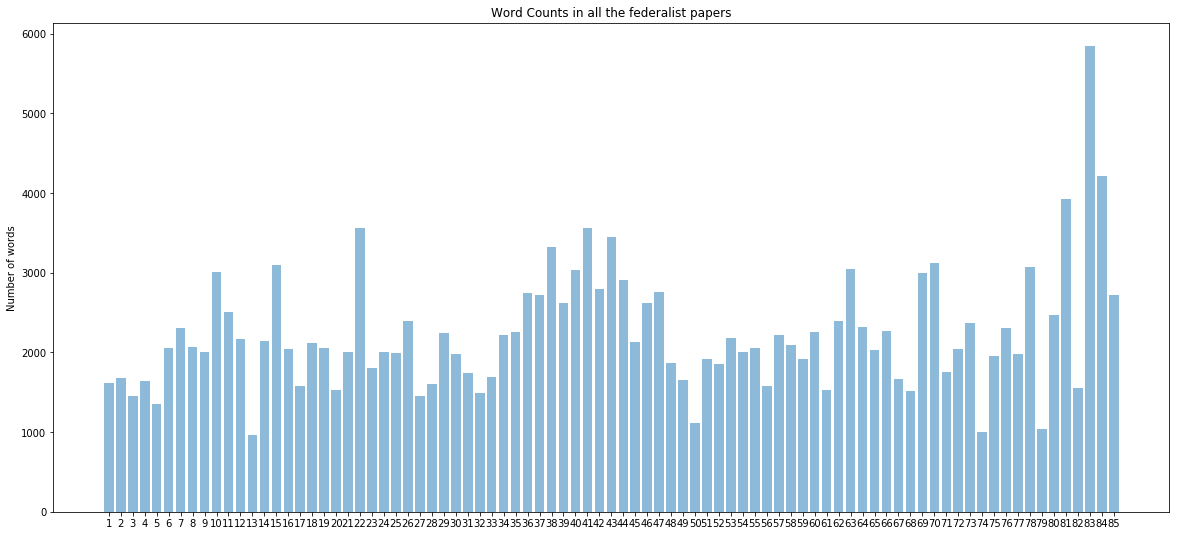

In [46]:
objects = tuple(df.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = df.total_words.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of words')
plt.title('Word Counts in all the federalist papers')
 
plt.show()

In [47]:
dfhamilton=df[df['author'] == 'HAMILTON']
dfmadison=df[df['author'] == 'MADISON']
#dfjay=df[df['author'] == 'JAY']

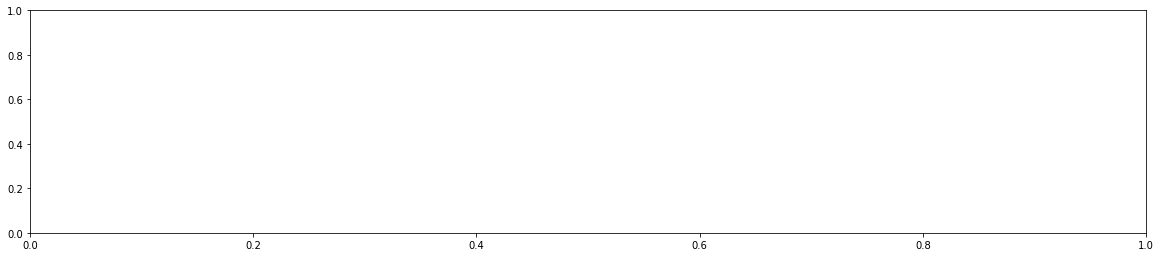

In [48]:
plt.figure()
plt.subplot(2,1,1)

Text(0.5,1,'HAMILTON')

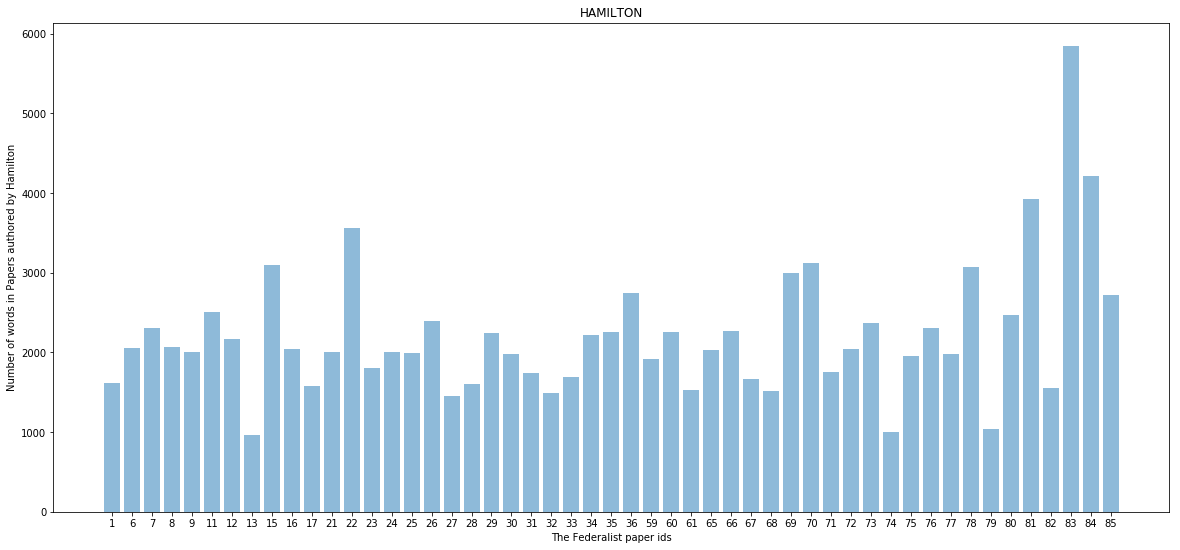

In [49]:
objects = tuple(dfhamilton.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfhamilton.total_words.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of words in Papers authored by Hamilton')
plt.xlabel('The Federalist paper ids')

plt.title('HAMILTON')
 
#plt.show()

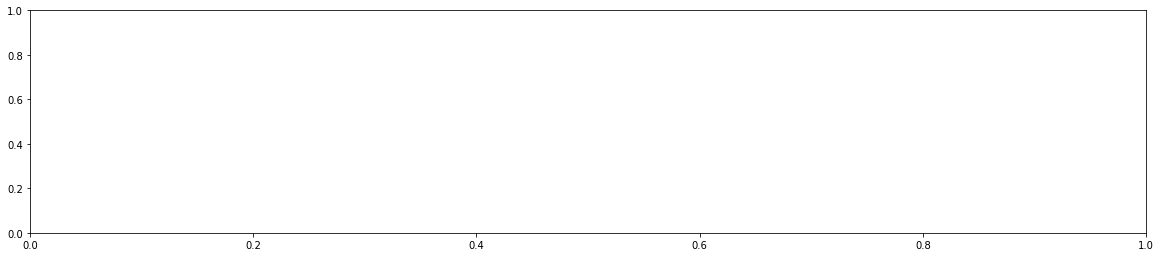

In [50]:
plt.subplot(2,1,2)

Text(0.5,1,'MADISON')

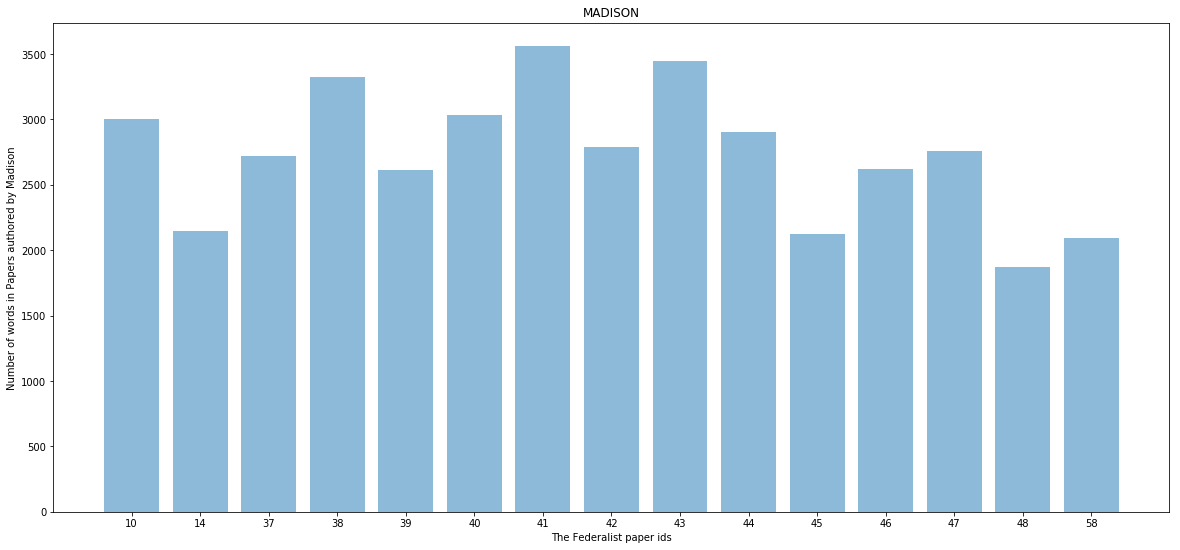

In [51]:
objects = tuple(dfmadison.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfmadison.total_words.tolist()
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.ylabel('Number of words in Papers authored by Madison')
plt.xlabel('The Federalist paper ids')

plt.title('MADISON')
 

 
#plt.show()

In [52]:
dfmadison['number_of_sentences']=0
dfhamilton['number_of_sentences']=0
dfmadison['Words_per_sentence_avg']=0
dfhamilton['Words_per_sentence_avg']=0

for i in range(0,len(dfmadison)):
    dfmadison['number_of_sentences'].iloc[i]=len(dfmadison['text'].iloc[i].split("."))
    dfmadison['Words_per_sentence_avg'].iloc[i]=dfmadison['total_words'].iloc[i]/dfmadison['number_of_sentences'].iloc[i]
    
for i in range(0,len(dfhamilton)):
    dfhamilton['number_of_sentences'].iloc[i]=len(dfhamilton['text'].iloc[i].split("."))
    dfhamilton['Words_per_sentence_avg'].iloc[i]=dfhamilton['total_words'].iloc[i]/dfhamilton['number_of_sentences'].iloc[i]

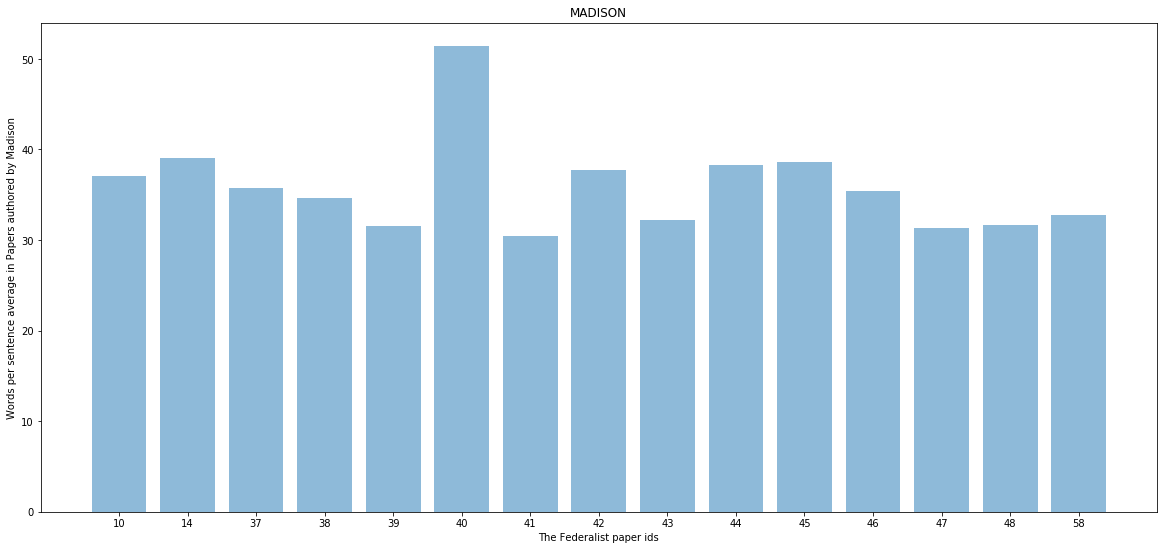

In [53]:
objects = tuple(dfmadison.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfmadison.Words_per_sentence_avg.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Words per sentence average in Papers authored by Madison')
plt.xlabel('The Federalist paper ids')

plt.title('MADISON')
 
plt.show()

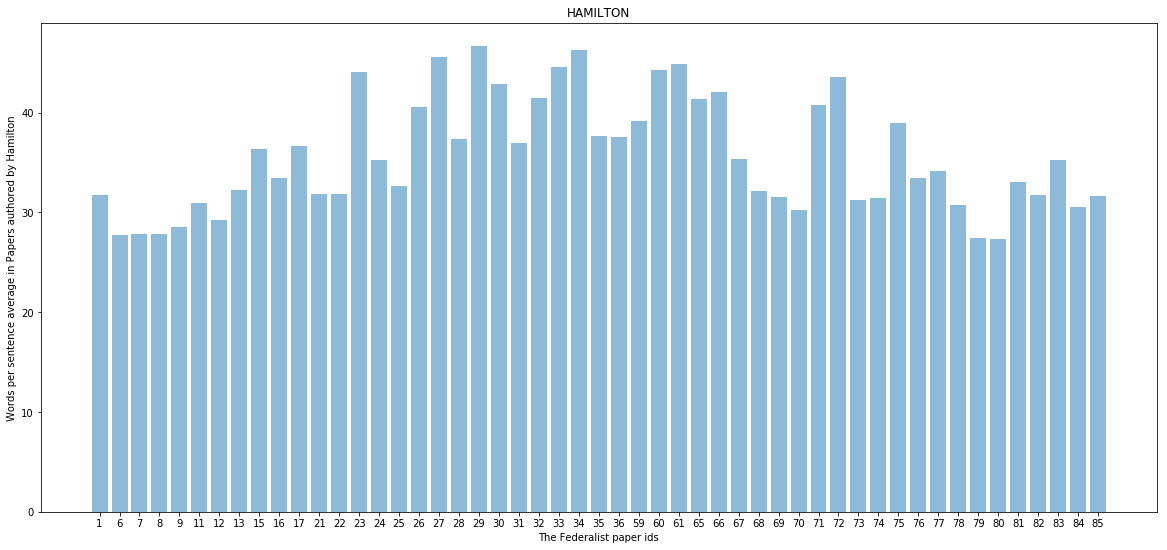

In [54]:
objects = tuple(dfhamilton.paper_id.tolist())
y_pos = np.arange(len(objects))
performance = dfhamilton.Words_per_sentence_avg.tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Words per sentence average in Papers authored by Hamilton')
plt.xlabel('The Federalist paper ids')

plt.title('HAMILTON')
 
plt.show()

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Frequency distribution of total words in papers')

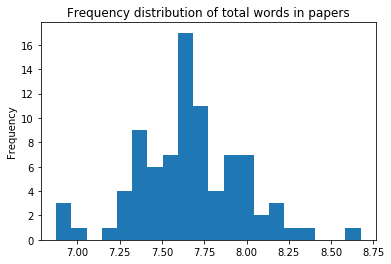

In [57]:
%matplotlib inline
x = np.log(df['total_words'])
plt.hist(x, normed=False, bins=20)
plt.ylabel('Frequency');
plt.title("Frequency distribution of total words in papers")

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Frequency distribution of words per sentences in papers authored by Hamilton')

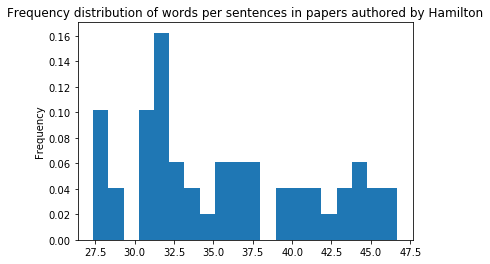

In [58]:
x = dfhamilton.Words_per_sentence_avg.tolist()
plt.hist(x, normed=True, bins=20)
plt.ylabel('Frequency');
plt.title("Frequency distribution of words per sentences in papers authored by Hamilton")

C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Frequency distribution of words per sentences in papers authored by Madison')

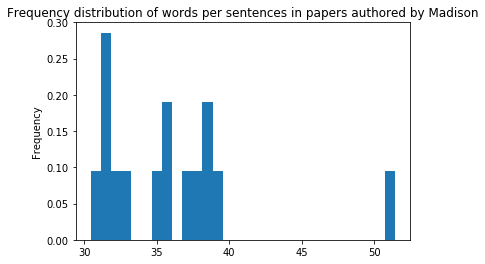

In [59]:
x = dfmadison.Words_per_sentence_avg.tolist()
plt.hist(x, normed=True, bins=30)
plt.ylabel('Frequency');
plt.title("Frequency distribution of words per sentences in papers authored by Madison")

In [60]:
dfcombine=pd.concat([dfhamilton,dfmadison])

Text(0.5,0.98,'')

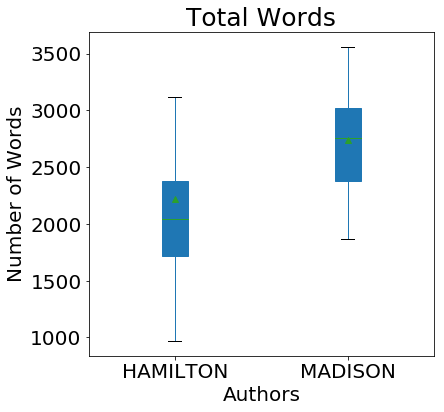

In [61]:
ax1=dfcombine.boxplot(column='total_words',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showfliers=False, showmeans=True)

ax1.set_title('Total Words',fontsize=25)

ax1.set_xlabel('Authors',fontsize=20)

ax1.set_ylabel('Number of Words',fontsize=20)

ax1.patch.set_facecolor('#FFFFFF')

ax1.figure.suptitle("")

Text(0.5,0.98,'')

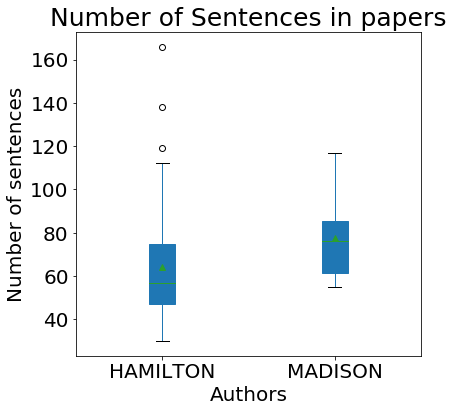

In [62]:
ax2=dfcombine.boxplot(column='number_of_sentences',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax2.set_title('Number of Sentences in papers',fontsize=25)

ax2.set_xlabel('Authors',fontsize=20)

ax2.set_ylabel('Number of sentences',fontsize=20)

ax2.patch.set_facecolor('#FFFFFF')

ax2.figure.suptitle("")

Text(0.5,0.98,'')

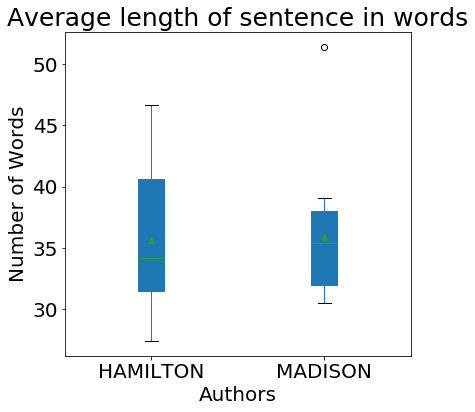

In [63]:
ax3=dfcombine.boxplot(column='Words_per_sentence_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax3.set_title('Average length of sentence in words',fontsize=25)

ax3.set_xlabel('Authors',fontsize=20)

ax3.set_ylabel('Number of Words',fontsize=20)

ax3.patch.set_facecolor('#FFFFFF')

ax3.figure.suptitle("")

In [66]:
"""colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1,bplot2,bplot3,bplot4,bplot5,bplot6):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)"""

"colors = ['pink', 'lightblue', 'lightgreen']\nfor bplot in (bplot1,bplot2,bplot3,bplot4,bplot5,bplot6):\n    for patch, color in zip(bplot['boxes'], colors):\n        patch.set_facecolor(color)"

In [67]:
dfcombine['by_count']=0
dfcombine['from_count']=0
dfcombine['to_count']=0
dfcombine['at_count']=0

for i in range(0,len(dfcombine)):
    dfcombine['by_count'].iloc[i]=dfcombine['text'].iloc[i].count('by')
    dfcombine['at_count'].iloc[i]=dfcombine['text'].iloc[i].count('at')
    dfcombine['from_count'].iloc[i]=dfcombine['text'].iloc[i].count('from')
    dfcombine['to_count'].iloc[i]=dfcombine['text'].iloc[i].count('to')

dfcombine['by_avg']=0
dfcombine['from_avg']=0
dfcombine['to_avg']=0
dfcombine['at_avg']=0


for i in range(0,len(dfcombine)):
    dfcombine['by_avg'].iloc[i]=(dfcombine['by_count'].iloc[i]/dfcombine['total_words'].iloc[i])*1000
    dfcombine['at_avg'].iloc[i]=(dfcombine['at_count'].iloc[i]/dfcombine['total_words'].iloc[i])*1000
    dfcombine['from_avg'].iloc[i]=(dfcombine['from_count'].iloc[i]/dfcombine['total_words'].iloc[i])*1000
    dfcombine['to_avg'].iloc[i]=(dfcombine['to_count'].iloc[i]/dfcombine['total_words'].iloc[i])*100

Text(0.5,0.98,'')

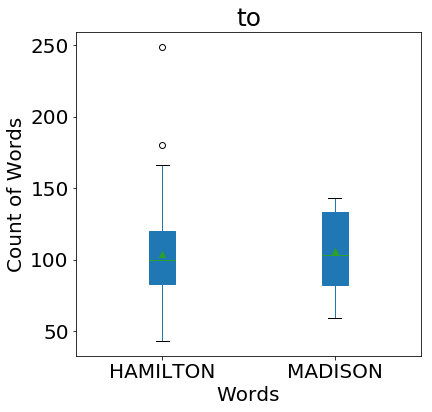

In [68]:
ax4=dfcombine.boxplot(column='to_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax4.set_title('to',fontsize=25)
ax4.set_xlabel('Words',fontsize=20)

ax4.set_ylabel('Count of Words',fontsize=20)

ax4.patch.set_facecolor('#FFFFFF')

ax4.figure.suptitle("")

Text(0.5,0.98,'')

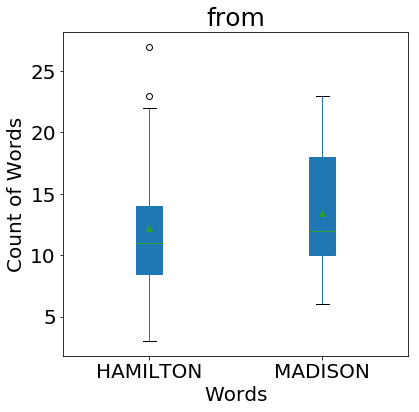

In [69]:
ax5=dfcombine.boxplot(column='from_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax5.set_title('from',fontsize=25)

ax5.set_xlabel('Words',fontsize=20)

ax5.set_ylabel('Count of Words',fontsize=20)

ax5.patch.set_facecolor('#FFFFFF')

ax5.figure.suptitle("")

Text(0.5,0.98,'')

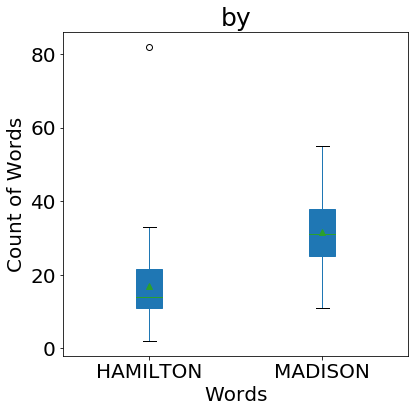

In [70]:
ax6=dfcombine.boxplot(column='by_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax6.set_title('by',fontsize=25)

ax6.set_xlabel('Words',fontsize=20)

ax6.set_ylabel('Count of Words',fontsize=20)

ax6.patch.set_facecolor('#FFFFFF')

ax6.figure.suptitle("")

Text(0.5,0.98,'')

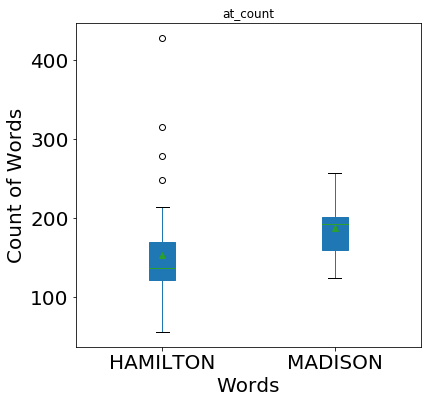

In [71]:
ax7=dfcombine.boxplot(column='at_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax6.set_title('at',fontsize=25)

ax7.set_xlabel('Words',fontsize=20)

ax7.set_ylabel('Count of Words',fontsize=20)

ax7.patch.set_facecolor('#FFFFFF')

ax7.figure.suptitle("")

Text(0.5,0.98,'')

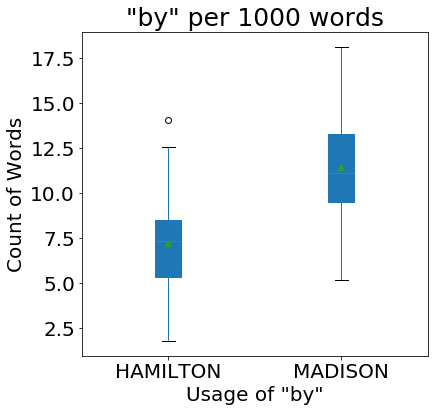

In [72]:
ax8=dfcombine.boxplot(column='by_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax8.set_title('"by" per 1000 words',fontsize=25)

ax8.set_xlabel('Usage of "by"',fontsize=20)

ax8.set_ylabel('Count of Words',fontsize=20)

ax8.patch.set_facecolor('#FFFFFF')

ax8.figure.suptitle("")
#ax8.figure

Text(0.5,0.98,'')

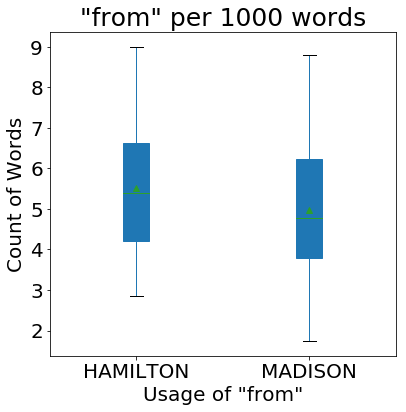

In [73]:
ax9=dfcombine.boxplot(column='from_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax9.set_title('"from" per 1000 words',fontsize=25)

ax9.set_xlabel('Usage of "from"',fontsize=20)

ax9.set_ylabel('Count of Words',fontsize=20)

ax9.patch.set_facecolor('#FFFFFF')

ax9.figure.suptitle("")

Text(0.5,0.98,'')

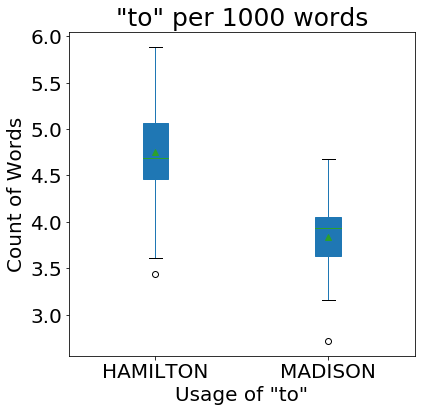

In [74]:
ax10=dfcombine.boxplot(column='to_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax10.set_title('"to" per 1000 words',fontsize=25)

ax10.set_xlabel('Usage of "to"',fontsize=20)

ax10.set_ylabel('Count of Words',fontsize=20)

ax10.patch.set_facecolor('#FFFFFF')

ax10.figure.suptitle("")

Text(0.5,0.98,'')

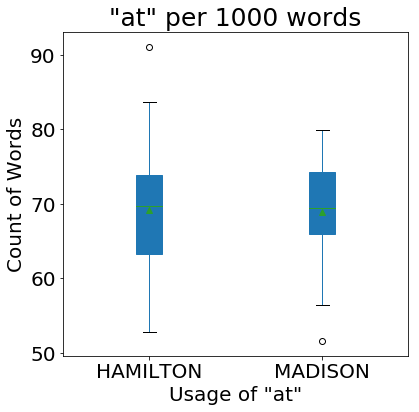

In [75]:
ax11=dfcombine.boxplot(column='at_avg',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

ax11.set_title('"at" per 1000 words',fontsize=25)

ax11.set_xlabel('Usage of "at"',fontsize=20)

ax11.set_ylabel('Count of Words',fontsize=20)

ax11.patch.set_facecolor('#FFFFFF')

ax11.figure.suptitle("")

In [76]:
dfcombine=dfcombine.drop('wordcount',axis=1)

In [77]:
#dfcombine

In [78]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
le = preprocessing.LabelEncoder()
le.fit(list(dfcombine['author'].unique()))
list(le.classes_)
dfcombine['author']=le.transform(dfcombine.author.tolist())

In [81]:
dffinal=df.drop(['date','title','venue','wordcount'],axis=1)

In [85]:
X=dfcombine.iloc[:,6:16]
y=dfcombine.iloc[:,4]

In [86]:
#TRAIN AND TEST SPLIT FOR X & y RESPECTIVELY
X_train, X_test, y_train, y_test = train_test_split(train,test,train_size=0.8)

In [88]:
#EXECUTING SIMPLE LINEAR LOGISTIC REGRESSION
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
print("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_test, lr.predict(X_test)))

Logistic regression Train Accuracy ::  0.9285714285714286


In [92]:
confusion_matrix(y_test,lr.predict(X_test),labels=[0,1])

array([[10,  1],
       [ 0,  3]], dtype=int64)

In [93]:
td=df[df['author']=='HAMILTON OR MADISON']

In [94]:
td['number_of_sentences']=0
td['Words_per_sentence_avg']=0
td['by_count']=0
td['from_count']=0
td['to_count']=0
td['at_count']=0
td['by_avg']=0
td['from_avg']=0
td['to_avg']=0
td['at_avg']=0

for i in range(0,len(td)):
    td['number_of_sentences'].iloc[i]=len(td['text'].iloc[i].split("."))
    td['Words_per_sentence_avg'].iloc[i]=td['total_words'].iloc[i]/td['number_of_sentences'].iloc[i]
    td['by_count'].iloc[i]=td['text'].iloc[i].count('by')
    td['at_count'].iloc[i]=td['text'].iloc[i].count('at')
    td['from_count'].iloc[i]=td['text'].iloc[i].count('from')
    td['to_count'].iloc[i]=td['text'].iloc[i].count('to')
    td['by_avg'].iloc[i]=(td['by_count'].iloc[i]/td['total_words'].iloc[i])*1000
    td['at_avg'].iloc[i]=(td['at_count'].iloc[i]/td['total_words'].iloc[i])*1000
    td['from_avg'].iloc[i]=(td['from_count'].iloc[i]/td['total_words'].iloc[i])*1000
    td['to_avg'].iloc[i]=(td['to_count'].iloc[i]/td['total_words'].iloc[i])*100
    

In [95]:
td=td.drop('wordcount',axis=1)

In [96]:
test_x=td.iloc[:,6:16]

In [99]:
predictions=lr.predict(test_x)

In [100]:
predictions

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [102]:
le.inverse_transform(predictions)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['MADISON', 'MADISON', 'MADISON', 'HAMILTON', 'MADISON', 'MADISON',
       'HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON', 'MADISON'],
      dtype='<U8')

In [172]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
test_X=td.iloc[:,6:16]
rf.fit(X_train, y_train);

In [173]:
predictions = rf.predict(test_X)

In [174]:
predictions

array([0.495, 0.477, 0.672, 0.048, 0.929, 0.707, 0.636, 0.585, 0.126,
       0.098, 0.952])

In [175]:
df2=pd.DataFrame(predictions)
df2[df2[0]>0.7]=1
df2[df2[0]<=0.7]=0

In [176]:
l=[]
for i in df2[0].tolist():
    l.append(int(i))

In [177]:
le.inverse_transform(l)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON', 'MADISON',
       'MADISON', 'HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON',
       'MADISON'], dtype='<U8')